# 1. Data Exploration

In [0]:
# import needed Liberaries
import numpy as np     #for data manipulation
import pandas as pd    

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for pretty notebook
%matplotlib inline 

# for split data into train and test set
from sklearn.model_selection import train_test_split
# for evaluation metrics
from sklearn.metrics import recall_score, precision_score, fbeta_score, accuracy_score, make_scorer

# import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# for optimization/ hyperparameters tuning
from sklearn.model_selection import GridSearchCV


In [0]:
#load the data
data = pd.read_csv('Churn_Modelling.csv')

#display first 5 rows 
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


the data contains 13 features, are they all effect our target? we will check it later.

Now let's explore if our dataset has missing values

In [0]:
# check if there're missing values in our dataset
print("our data has missing value? \n\t\t\t\t", True == data.isnull().sum().max()) 

our data has missing value? 
				 False


In [0]:
#check formating
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Our data doesn't suffer from misformating, there's nothing to do here.

In [0]:
#Descriptive analysis
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Again all is good, nothing to worry about here.

# 2. Data Visualization

We will visualize some relation to see how the features effect our target. it's time to answer the Question above.

first we need to figure is our data balanced?
1. Proportion of Customer churn.

it's time to answer our question above "how the features effect our target?".

2. Correlation between features and target.
    
Is there a relation between dependent features and the other independent?

3. plot the relation between dependent and independent features

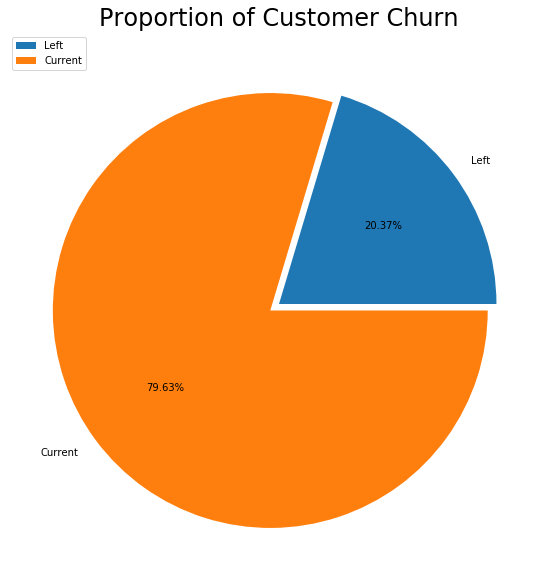

In [0]:
#Create a list that contains the number of churned customer and current customer
ex_and_current_customers = [data.Exited[data['Exited']==1].count(), data.Exited[data['Exited']==0].count()]

#set figure size and title
plt.subplots(figsize=(10, 10))
plt.title('Proportion of Customer Churn', size = 24)

#display the proportion of Customer Churn
plt.pie(ex_and_current_customers,labels = ['Left', 'Current'], autopct= '%.2f%%', explode = (0 , 0.05))
plt.legend(labels = ['Left', 'Current'], loc = "upper left")
plt.show()

more than 1/5 of Customers are left the bank! It's a high churn ratio, But we've another issue to care about here.

Our data is imbalanced and that may occur a trouble if we evaluate our model on this data. I wish it wouldn't but we will see later if there's a problem and how to handle this case.

---------------------
Now let's the Correlation between our features and target.

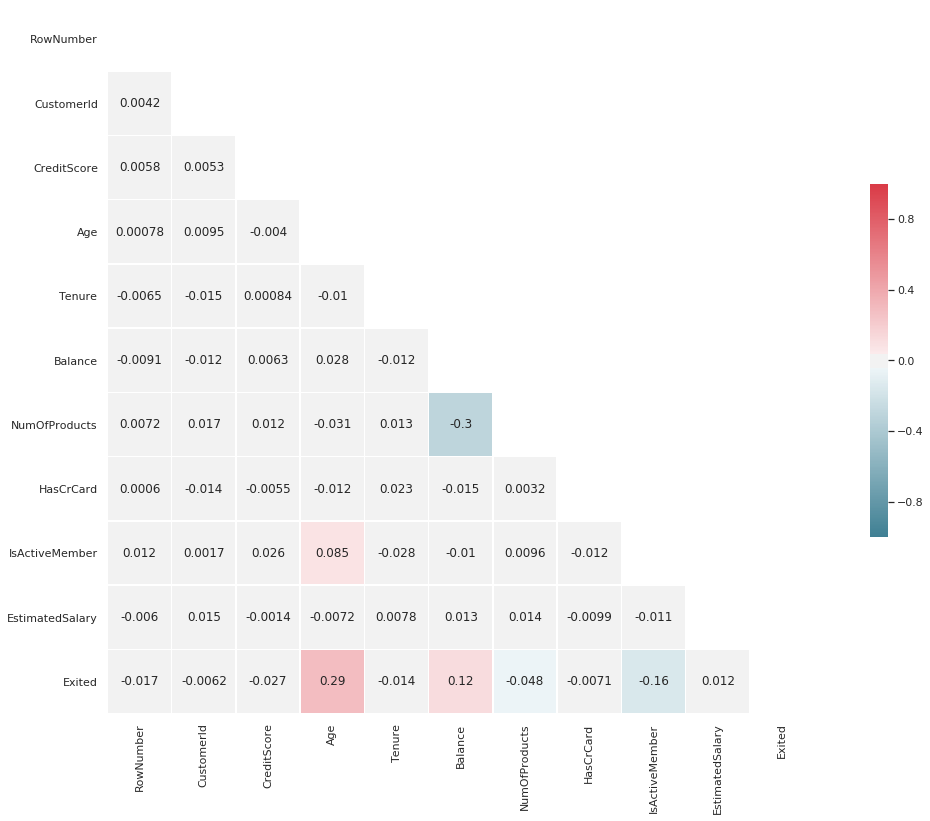

In [0]:
#Calculate the correlation 
corr = data.corr()

#set sns style
sns.set(style="white")


## Plotting Diagonal correlation
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Set figure size 
plt.subplots(figsize=(20,13))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin = -1, vmax=1, center=0,
            square=True, linewidths=0.5, annot= True,cbar_kws={"shrink": .5})

Here's an important and interesting thing. but first let me explain a very quick and simple explanation about 

***Correlation matrix***:


    Correlation matrix is a table showing correlation between variables.
    if - correlation value = 0 there's no correlation
       - correlation value close to +1 there's a large postive correlation
       - correlation value close to -1 there's a large negative correlation.
    
If you want to know more [here's a blog](https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22) written by Srishti Saha you'll find mathmatical equations, some explaination and implementation in R and an application using python.
    
So, The features we care about are:
    - Age
    - Balance
    - NumOfProducts
    - IsActiveMember
and almost there's no correlation between our target and:
    - RowNumber
    - CustomerId
    - CreditScore
    - Tenure
    - HasCrCard
    - EstimatedSalary

But let's figure the relation between dependent and independent features.



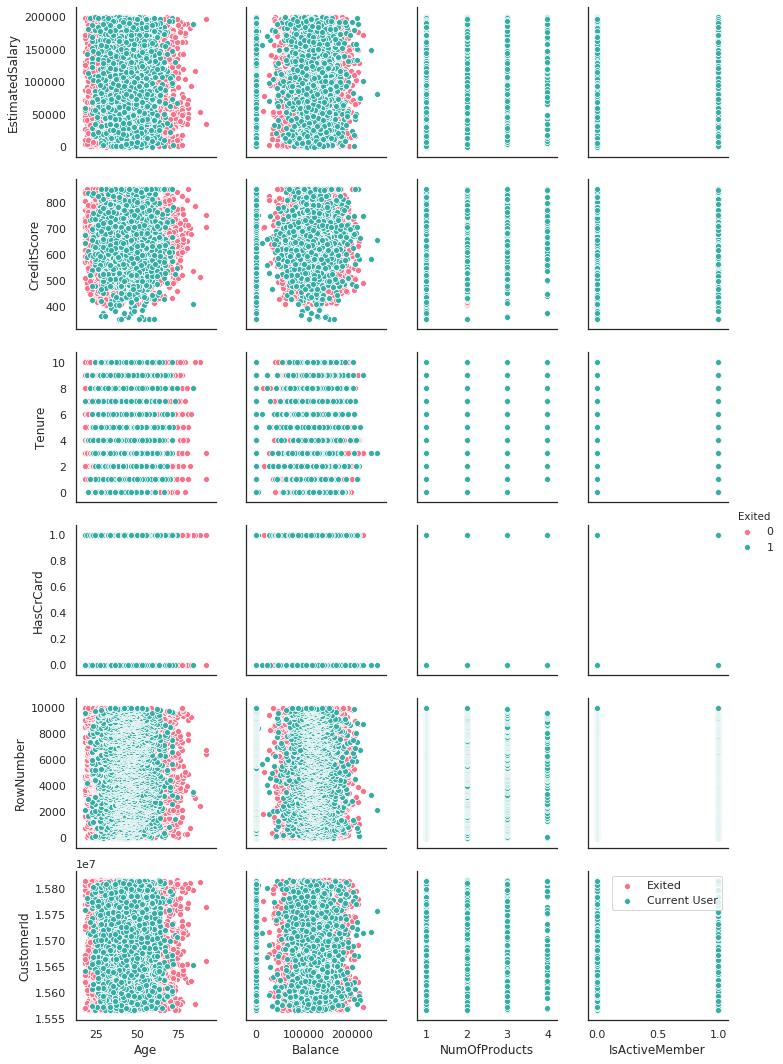

In [0]:
# Plot the relation between the dependent values 
g = sns.pairplot(data= data, 
                 hue="Exited", 
                 x_vars= ['Age', 'Balance', 'NumOfProducts', 'IsActiveMember'], 
                 y_vars= ['EstimatedSalary', 'CreditScore', 'Tenure', 'HasCrCard', 'RowNumber', 'CustomerId'],
                 palette="husl")
#Add legend
plt.legend(labels=['Exited', 'Current User'], loc= 'upper right')

As shown in figure, it's random distributed and there's no direct relation between independent and dependent features.

=================================================================================

Ok, This was for numerical values but what about Surname, Geography and Gender?
The reason for almost all decisions I take is statistics but logically Surname wouldn't be effect the churn customer. Let's concentrate on Geohraphy and gender.

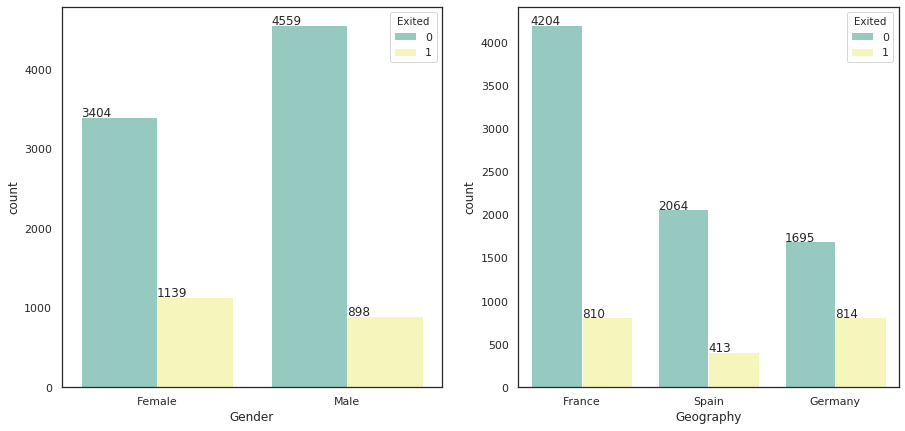

In [0]:
# plot countplot for Gender and Geography
# split figure
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize= (15,7))

ax1 = sns.countplot(x="Gender", hue="Exited", data= data, ax= axes[0],  palette="Set3")
ax2 = sns.countplot(x="Geography", hue="Exited", data= data, ax = axes[1],  palette="Set3")


# add annotate to plot
for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x(), p.get_height()))
    
for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x(), p.get_height()))


    

From last figure we get:
    - 1139 women and 898 Men are left the bank.
    - we can say the Germans don't like this bank so much as almost half of german people left the bank, and it's the highest value of churn/Exited customers.
    
Note: this will not help us for cleaning or speedup our performance but this figure to understand and get solid knowledge about our dataset.

Now We've enough knowledge about the dataset and we're ready to work with it
Let's begin 
# 3. Preprocessing

## 3.1. Data Cleaning

In [0]:
## remove unnecessary features
data.drop(['RowNumber', 'CustomerId', 'CreditScore', 'Tenure', 'HasCrCard', 'EstimatedSalary', 'Surname'], 
          axis = 1, inplace = True)

data.head()

,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited
0,France,Female,42,0.00,1,1,1
1,Spain,Female,41,83807.86,1,1,0
2,France,Female,42,159660.80,3,0,1
3,France,Female,39,0.00,2,0,0
4,Spain,Female,43,125510.82,1,1,0


In [0]:
# use one-hot encoding to 
data = pd.get_dummies(data = data ,columns=['Gender', 'Geography'])
# rename transfered column
data.rename(columns={'Gender_Female':'Female',
                     'Gender_Male':'Male',
                     'Geography_France': 'France',
                     'Geography_Germany' : 'Germany',
                     'Geography_Spain':'Spain'}, inplace = True)
data.head()

,Age,Balance,NumOfProducts,IsActiveMember,Exited,Female,Male,France,Germany,Spain
0,42,0.00,1,1,1,1,0,1,0,0
1,41,83807.86,1,1,0,1,0,0,0,1
2,42,159660.80,3,0,1,1,0,1,0,0
3,39,0.00,2,0,0,1,0,1,0,0
4,43,125510.82,1,1,0,1,0,0,0,1


## 3.2 Data Normalization

In [0]:
#Using Simple scaling range 0:1
data['Balance'] = data['Balance'] / np.max(data['Balance'])
data['Age'] = data['Age'] / np.max(data['Age'])
data['NumOfProducts'] = data['NumOfProducts'] / np.max(data['NumOfProducts'])

# #Using Simple scaling range 0:1
# data['CreditScore'] = data['CreditScore'] / np.max(data['CreditScore'])
# data['EstimatedSalary'] = data['EstimatedSalary'] / np.max(data['EstimatedSalary'])

#display data after normalization
data.head()

,Age,Balance,NumOfProducts,IsActiveMember,Exited,Female,Male,France,Germany,Spain
0,0.456522,0.000000,0.25,1,1,1,0,1,0,0
1,0.445652,0.334031,0.25,1,0,1,0,0,0,1
2,0.456522,0.636357,0.75,0,1,1,0,1,0,0
3,0.423913,0.000000,0.50,0,0,1,0,1,0,0
4,0.467391,0.500246,0.25,1,0,1,0,0,0,1


## 3.3 Shuffle and Split Data

In [0]:
# Split the data into features and target label
feature = data.drop(['Exited'], axis = 1)
target = data['Exited']

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature, 
                                                    target, 
                                                    test_size = 0.30, 
                                                    random_state = 200)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 7000 samples.
Testing set has 3000 samples.


***Note:*** The reason why I chose 0.30 test_size here, The dataset is very small. in other case if the dataset is large "millions" the ratio of being 0.98 train and 0.01 dev set and 0.01 test set well be more effective.

# 4. Model Evaluating

## 4.1 Benchmark Model

In [0]:
# create an object from DecisionTreeClassifierabs 
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


#predict
prediction_train = clf.predict(X_train)
prediction_test = clf.predict(X_test)

#calculate the accuracy
acc_train = accuracy_score(y_train, prediction_train)
acc_test = accuracy_score(y_test, prediction_test)

#calculate the f-beta score
f_train = fbeta_score(y_train, prediction_train, beta = 0.5)
f_test = fbeta_score(y_test, prediction_test, beta = 0.5)

#print the results
print("Training accuracy {:.2f}%".format(acc_train*100))
print("Testing accuracy {:.2f}%".format(acc_test*100))
print("")
print("Training f-score {:.4f}".format(f_train))
print("Testing f-score {:.4f}".format(f_test))

Training accuracy 97.80%
Testing accuracy 79.87%

Training f-score 0.9666
Testing f-score 0.5165


Oh! we've a very good training accuracy and f-score. But there's a very high variance, the difference between training and testing accuracy which means we're suffring from overfitting. 

How to solve this problem?
    Dealing with high variance problem or overfitting may be solved by
        - Try different Classifier.
        - Collecting more data.
        - Use regularization (L1 "Lasso" or L2 "Ridge" Regularization).

What we gonna do?
- We'll try other classifiers
- Collecting more data? I think it'll be very helpful and it'll work much better but, Can I collect more data for this dataset? Honestly No, But here what I can do:
    - We can use under sampling that happens by shrink the ones values of "Exited" or our target to number that equal the number of Zeros values of our target that will solve the problem of inbalanced data we talked about above but Will that help? actually I don't know but we will figure out.
    - another solution as in DeepLearning Data Augmentation helps to increase size of data by using random croping, color shifting, mirror the images or use them all at once. I think we can use the same concept of data augmentation. How? we will fake the Zero's values or in other words increase it to eb equal the number of values of ones. I guess, We can do that using faker liberary but honestly I'm lazy to try it now so I'll go with my first solution.

## 4.2 Data Resampling 

In [0]:
# store No. of Exited samples and indices
Exited_records = data['Exited'].sum()
Exited_indices = np.array(data[data.Exited == 1].index)

# Picking the indices of the Current customers
current_customer_indices = data[data.Exited == 0].index

# Out of the indices we picked, randomly select number of current_custoemr_records = number of Exited records 
random_current_customer_indices = np.random.choice(current_customer_indices, Exited_records, replace = False)
random_current_customer_indices = np.array(random_current_customer_indices)

# Merge the 2 indices
under_sample_indices = np.concatenate([Exited_indices, random_current_customer_indices])

# Copy under sample dataset  
under_sample_data = data.iloc[under_sample_indices,:]

# Split data into features and target labels 
features_undersample = under_sample_data.drop(['Exited'], axis = 1)
target_undersample = under_sample_data['Exited']

# Show ratio
print("Percentage of Current Customer: ", under_sample_data.Exited[under_sample_data['Exited'] == 0].count())
print("Percentage of Churn Customer: ", under_sample_data.Exited[under_sample_data['Exited'] == 1].count())
print("Total number in resampled data: ", under_sample_data['Exited'].count())

Percentage of Current Customer:  2037
Percentage of Churn Customer:  2037
Total number in resampled data:  4074


Now Zeros and ones are equal. let's visualize it.

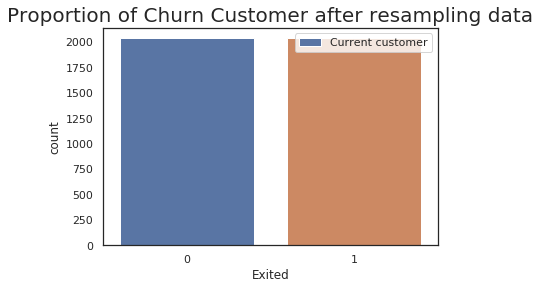

In [0]:
under_sample_Exited_Current = [under_sample_data.Exited[under_sample_data['Exited'] == 0].count(), Exited_records]

# Plot the proportion 

plt.title("Proportion of Churn Customer after resampling data", size = 20)
ax = sns.countplot(x = under_sample_data['Exited'], 
                   data= under_sample_data)
ax = plt.legend(labels= ['Current customer', 'Past customer'])

## 4.2.1 shuffle and split after sampling

As we did before we will shuffle and split the data to train and test sets but this time we will split the new resampled data.

In [0]:
# Split the 'features_undersample' and 'target_anderSample' data into training and testing sets
X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(features_undersample,
                                                                                    target_undersample,
                                                                                    test_size = 0.3,
                                                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train_sampled.shape[0]))
print("Testing set has {} samples.".format(X_test_sampled.shape[0]))

Training set has 2851 samples.
Testing set has 1223 samples.


## 4.3 Our Model 

I'll try some other classifiers to see if it helps to solve overfitting problem that we were facing in benchmark model.


The classifiers are:
   
    1- Support Victor machine.
    2- Adaptive Boosting.
    3- Random Forest.
===========================================    
Why These Classifiers?
    
    1- SVM: 
          
          First thing first, I like this algorithm and that the first reason of choosing it. SVM has 3 amazing kernels "linear, polynomial, rbf, sigmoid or precomputed" that makes it very helpfull in different domains. Why I chose it on this dataset? 
                    
          - SVM is very flexible what I means is the boundary that the algorithm calculates doesn't have to be a straight line "Here I'm talking about non-linear SVM kernels".
          - It makes you capture much more complex relationships between your datapoints without having to perform difficult transformations on your own. 
          - It works very well on small and medium datasets. and we've a small dataset.
          
          But the downside for SVM is the training time is much longer as it's much more computationally intensive. but we don't care about time here. 
------------------------          
  
    2- Adaptive Boosting:
    
            I like the concept of boosting, creating a strong classifier from some week classifiers. This is done by building a model from the training data, then creating a second model that attempts to correct the errors from the first model. Models are added until the training set is predicted perfectly or a maximum number of models are added.
            How AdaBoost works?
                Weak models are added sequentially, trained using the weighted training data. The process continues until a pre-set number of weak learners have been created (a user parameter) or no further improvement can be made on the training dataset. Once completed, you are left with a pool of weak learners each with a stage value.
            Why AdaBoost over other boosting algorithms?
                - actually the other boosting algorithms are amazing too and I chose AdaBoost because it came to my mind first but GriedentBoosting will work very well too.
                - AdaBoost can be used to boost the performance of any machine learning algorithm.
            
            We will see what AdaBoost can do with the dataset we have.
----------------------------            
    3- RandomForest:
            
            First to be honest when I chose decision tree as benchmark, I chose it because I thought it'll work very bad on our dataset, decision tree is a simple algorithm and it work well on large data and we don't have this requirement. But it has really impressed me, Apart from it's overfitting the training set but it also gives a good accuracy on test sets. And here why I chose RandomForest as my 3rd algorithm to try. Because a forest consists from trees, The RandomForest is a combination of number of decision tree. 
            
            What a random forest algorithm does? 
                - it creates multiple decision trees and merges them together to obtain a more stable and accurate prediction. In general, the more trees in the forest, the more robust would be the prediction and thus higher accuracy and that what I hope to get. 

            We will see if it overfit the training data too as what decision tree did. 

[Here you can read more about RandomForest and Decision trees and when and why to use them.](https://www.newgenapps.com/blog/random-forest-analysis-in-ml-and-when-to-use-it#:~:targetText=Why%20use%20Random%20Forest%20Algorithm&targetText=It%20provides%20higher%20accuracy.,overfitting%20trees%20in%20the%20model)
                
                
                
                
    
            

### SVM Classifier

In [0]:
# create an object from SVC 
svc = SVC(random_state = 200, gamma='scale')
svc.fit(X_train, y_train)

#predict
prediction_train = svc.predict(X_train)
prediction_test = svc.predict(X_test)

#calculate the accuracy
acc_train = accuracy_score(y_train, prediction_train)
svc_normal_acc_test = accuracy_score(y_test, prediction_test)

#calculate the f-beta score
f_train = fbeta_score(y_train, prediction_train, beta = 0.5)
svc_normal_f_test = fbeta_score(y_test, prediction_test, beta = 0.5)

# Calculate the Recall Score
recall_train = recall_score(y_train, prediction_train)
svc_normal_recall_test = recall_score(y_test, prediction_test)

# Calculate Precision score
precision_train = precision_score(y_train, prediction_train)
svc_normal_precision_test = precision_score(y_test, prediction_test)

#print the results
print("Support Vector Classifier results:\n")
print("Training accuracy {:.2f}%".format(acc_train*100))
print("Testing accuracy {:.2f}%".format(svc_normal_acc_test*100))
print("")
print("Training f-score {:.4f}".format(f_train))
print("Testing f-score {:.4f}".format(svc_normal_f_test))
print('\nRecall score on training set: {:.4f}'.format(recall_train))
print('Recall score on testing set: {:.4f}'.format(svc_normal_recall_test))
print("\nprecision score on training set: {:.4f}".format(precision_train))
print("precision score on testing set: {:.4f}".format(svc_normal_precision_test))

Support Vector Classifier results:

Training accuracy 83.73%
Testing accuracy 82.70%

Training f-score 0.5523
Testing f-score 0.5308

Recall score on training set: 0.2260
Recall score on testing set: 0.2079

precision score on training set: 0.8641
precision score on testing set: 0.8675


=================

Wow! overfitting is solved. and now we have testing accuracy 82.7%, it's better than the benchmark results. 

------------------------------------------------------------------
Let's see what AdaBoost can do:

### AdaBoost

In [0]:
# create object from AdaBoostClassifier
AdaBoost= AdaBoostClassifier()
AdaBoost.fit(X_train, y_train)

#predict
prediction_train = AdaBoost.predict(X_train)
prediction_test = AdaBoost.predict(X_test)

#calculate the accuracy
acc_train = accuracy_score(y_train, prediction_train)
adaboost_acc_test = accuracy_score(y_test, prediction_test)

#calculate the f-beta score
f_train = fbeta_score(y_train, prediction_train, beta = 0.5)
adaboost_f_test = fbeta_score(y_test, prediction_test, beta = 0.5)

# Calculate the Recall Score
recall_train = recall_score(y_train, prediction_train)
adaboost_recall_test = recall_score(y_test, prediction_test)

# Calculate Precision score
precision_train = precision_score(y_train, prediction_train)
adaboost_precision_test = precision_score(y_test, prediction_test)

#print the results
print("AdaBoost Classifier results:\n----------")
print("Training accuracy {:.2f}%".format(acc_train*100))
print("Testing accuracy {:.2f}%".format(adaboost_acc_test*100))
print("")
print("Training f-score {:.4f}".format(f_train))
print("Testing f-score {:.4f}".format(adaboost_f_test))
print('\nRecall score on training set: {:.4f}'.format(recall_train))
print('Recall score on testing set: {:.4f}'.format(adaboost_recall_test))
print("\nprecision score on training set: {:.4f}".format(precision_train))
print("precision score on testing set: {:.4f}".format(adaboost_precision_test))

AdaBoost Classifier results:
----------
Training accuracy 86.14%
Testing accuracy 85.17%

Training f-score 0.6665
Testing f-score 0.6553

Recall score on training set: 0.4869
Recall score on testing set: 0.4714

precision score on training set: 0.7342
precision score on testing set: 0.7262


====================

Better results here. 
        
        We don't suffer from overfitting, we've better accuracy and f-beta score than we get with SVC. 
        
        Downside precision score is lower than we get with SVM Classifier.
        But Question is it really a downside? Do we care about precision, recall or both? we will discuss this later.
-------------------
Now let's see the RandomForest, will it overfitting as decision tree?

### RandomForest

In [0]:
# create object from RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators= 100)
RandomForest.fit(X_train, y_train)

#predict
prediction_train = RandomForest.predict(X_train)
prediction_test = RandomForest.predict(X_test)

#calculate the accuracy
acc_train = accuracy_score(y_train, prediction_train)
rf_acc_test = accuracy_score(y_test, prediction_test)

#calculate the f-beta score
f_train = fbeta_score(y_train, prediction_train, beta = 0.5)
rf_f_test = fbeta_score(y_test, prediction_test, beta = 0.5)

# Calculate the Recall Score
recall_train = recall_score(y_train, prediction_train)
rf_recall_test = recall_score(y_test, prediction_test)

# Calculate Precision score
precision_train = precision_score(y_train, prediction_train)
rf_precision_test = precision_score(y_test, prediction_test)

#print the results
print("RandomForest Classifier results:\n------------")
print("Training accuracy {:.2f}%".format(acc_train*100))
print("Testing accuracy {:.2f}%".format(rf_acc_test*100))
print("")
print("Training f-score {:.4f}".format(f_train))
print("Testing f-score {:.4f}".format(rf_f_test))
print('\nRecall score on training set: {:.4f}'.format(recall_train))
print('Recall score on testing set: {:.4f}'.format(rf_recall_test))
print("\nprecision score on training set: {:.4f}".format(precision_train))
print("precision score on testing set: {:.4f}".format(rf_precision_test))

RandomForest Classifier results:
------------
Training accuracy 97.79%
Testing accuracy 83.73%

Training f-score 0.9584
Testing f-score 0.6097

Recall score on training set: 0.9197
Recall score on testing set: 0.4905

precision score on training set: 0.9686
precision score on testing set: 0.6492


======================
Yes we're still suffring from overfitting. but the accuracy score is higher now and higher f-score too.

-------------------------

Now Let's solve the imbalanced data problem we've and see if the resampling will help us getting better results and performance.

## 4.3.1 Retrain our models after resampling

### Support Vector Machine

In [0]:
# Fit the SVC classifier to the under_sample_data
svc.fit(X_train_sampled, y_train_sampled)

# Predict
prediction_train_sampled = svc.predict(X_train_sampled)
prediction_test_sampled = svc.predict(X_test_sampled)

#calculate the accuracy
acc_train_sampled = accuracy_score(y_train_sampled, prediction_train_sampled)
svc_acc_test_sampled = accuracy_score(y_test_sampled, prediction_test_sampled)

#calculate the f-beta score
f_train_sampled = fbeta_score(y_train_sampled, prediction_train_sampled, beta = 0.5)
svc_f_test_sampled = fbeta_score(y_test_sampled, prediction_test_sampled, beta = 0.5)

# Calculate the Recall score on training and testing set for the sampled data
recall_train_sampled = recall_score(y_train_sampled, prediction_train_sampled)
svc_recall_test_sampled = recall_score(y_test_sampled, prediction_test_sampled)

# Calculate Precision score
precision_train_sampled = precision_score(y_train_sampled, prediction_train_sampled)
svc_precision_test_sampled = precision_score(y_test_sampled, prediction_test_sampled)


#print the results
print("SVC results on sampled data:\n-----------------")
print("")
print("Training accuracy {:.2f}%".format(acc_train_sampled*100))
print("Testing accuracy {:.2f}%".format(svc_acc_test_sampled*100))
print("")
print("Training f-score {:.4f}".format(f_train_sampled))
print("Testing f-score {:.4f}".format(svc_f_test_sampled))
# Print Recall score on training and testing set for the sampled data
print()
print('Recall score on training set of sampled data: {:.4f}'.format(recall_train_sampled))
print('Recall score on testing set of sampled data: {:.4f}'.format(svc_recall_test_sampled))
print("\nPrecision score on trainin set: {:.4f}".format(precision_train_sampled))
print("Precision score on testing set: {:.4f}".format(svc_precision_test_sampled))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC results on sampled data:
-----------------

Training accuracy 69.69%
Testing accuracy 69.34%

Training f-score 0.6963
Testing f-score 0.6964

Recall score on training set of sampled data: 0.6869
Recall score on testing set of sampled data: 0.7027

Precision score on trainin set: 0.6987
Precision score on testing set: 0.6949


### AdaBoost

In [0]:
# Fit the AdaBoostClassifier to the under_sample_data
AdaBoost.fit(X_train_sampled, y_train_sampled)

# Predict
prediction_train_sampled = AdaBoost.predict(X_train_sampled)
prediction_test_sampled = AdaBoost.predict(X_test_sampled)

#calculate the accuracy
acc_train_sampled = accuracy_score(y_train_sampled, prediction_train_sampled)
adaboost_acc_test_sampled = accuracy_score(y_test_sampled, prediction_test_sampled)

#calculate the f-beta score
f_train_sampled = fbeta_score(y_train_sampled, prediction_train_sampled, beta = 0.5)
adaboost_f_test_sampled = fbeta_score(y_test_sampled, prediction_test_sampled, beta = 0.5)

# Calculate the Recall score on training and testing set for the sampled data
recall_train_sampled = recall_score(y_train_sampled, prediction_train_sampled)
adaboost_recall_test_sampled = recall_score(y_test_sampled, prediction_test_sampled)

# Calculate Precision score
precision_train_sampled = precision_score(y_train_sampled, prediction_train_sampled)
adaboost_precision_test_sampled = precision_score(y_test_sampled, prediction_test_sampled)


#print the results
print("AdaBoost Classifier after resampling results:\n------------")
print("")
print("Training accuracy {:.2f}%".format(acc_train_sampled*100))
print("Testing accuracy {:.2f}%".format(adaboost_acc_test_sampled*100))
print("")
print("Training f-score {:.4f}".format(f_train_sampled))
print("Testing f-score {:.4f}".format(adaboost_f_test_sampled))
print()
print('Recall score on training set of sampled data: {:.4f}'.format(recall_train_sampled))
print('Recall score on testing set of sampled data: {:.4f}'.format(adaboost_recall_test_sampled))
print("\nPrecision score on trainin set: {:.4f}".format(precision_train_sampled))
print("Precision score on testing set: {:.4f}".format(adaboost_precision_test_sampled))

AdaBoost Classifier after resampling results:
------------

Training accuracy 77.69%
Testing accuracy 75.96%

Training f-score 0.7825
Testing f-score 0.7685

Recall score on training set of sampled data: 0.7489
Recall score on testing set of sampled data: 0.7367

Precision score on trainin set: 0.7914
Precision score on testing set: 0.7768


### RandomForest

In [0]:
# create object from RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators= 100)
# Fit the RandomForest to the under_sample_data
RandomForest.fit(X_train_sampled, y_train_sampled)

# Predict
prediction_train_sampled = RandomForest.predict(X_train_sampled)
prediction_test_sampled = RandomForest.predict(X_test_sampled)

#calculate the accuracy
acc_train_sampled = accuracy_score(y_train_sampled, prediction_train_sampled)
rf_acc_test_sampled = accuracy_score(y_test_sampled, prediction_test_sampled)

#calculate the f-beta score
f_train_sampled = fbeta_score(y_train_sampled, prediction_train_sampled, beta = 0.5)
rf_f_test_sampled = fbeta_score(y_test_sampled, prediction_test_sampled, beta = 0.5)

# Calculate the Recall score on training and testing set for the sampled data
recall_train_sampled = recall_score(y_train_sampled, prediction_train_sampled)
rf_recall_test_sampled = recall_score(y_test_sampled, prediction_test_sampled)

# Calculate Precision score
precision_train_sampled = precision_score(y_train_sampled, prediction_train_sampled)
rf_precision_test_sampled = precision_score(y_test_sampled, prediction_test_sampled)


#print the results
print("RandomForest Classifier after resampling results:\n----------------")
print("")
print("Training accuracy {:.2f}%".format(acc_train_sampled*100))
print("Testing accuracy {:.2f}%".format(rf_acc_test_sampled*100))
print("")
print("Training f-score {:.4f}".format(f_train_sampled))
print("Testing f-score {:.4f}".format(rf_f_test_sampled))
print()
print('Recall score on training set of sampled data: {:.4f}'.format(recall_train_sampled))
print('Recall score on testing set of sampled data: {:.4f}'.format(rf_recall_test_sampled))
print("\nPrecision score on trainin set: {:.4f}".format(precision_train_sampled))
print("Precision score on testing set: {:.4f}".format(rf_precision_test_sampled))

RandomForest Classifier after resampling results:
----------------

Training accuracy 97.16%
Testing accuracy 75.14%

Training f-score 0.9764
Testing f-score 0.7589

Recall score on training set of sampled data: 0.9626
Recall score on testing set of sampled data: 0.7334

Precision score on trainin set: 0.9799
Precision score on testing set: 0.7656


## 4.3.2 Test our Models on the whole data

### Support Vector Machine

In [0]:
# Use SVC model to predict the training and testing set of whole dataset

# Create prediction
prediction_train_after_sampling = svc.predict(X_train)
prediction_test_after_sampling = svc.predict(X_test)

# Calculate Accuracy score
acc_train_after_sampling = accuracy_score(y_train, prediction_train_after_sampling)
svc_acc_test_after_sampling = accuracy_score(y_test, prediction_test_after_sampling)

# Calculate F-beta score
f_train_after_sampling = fbeta_score(y_train, prediction_train_after_sampling, beta = 0.5)
svc_f_test_after_sampling = fbeta_score(y_test, prediction_test_after_sampling, beta = 0.5)

# Calculate the Recall Score
recall_train_after_sampling = recall_score(y_train, prediction_train_after_sampling)
svc_recall_test_after_sampling = recall_score(y_test, prediction_test_after_sampling)

# Calculate Precision score
precision_train_after_sampling = precision_score(y_train, prediction_train_after_sampling)
svc_precision_test_after_sampling = precision_score(y_test, prediction_test_after_sampling)

#print Scores
print("SVC result on whole dataset after resampling:\n----------")
print("\nAccuracy score on training set: {:.2f}%".format(acc_train_after_sampling*100))
print("Accuracy score on testing set: {:.2f}%".format(svc_acc_test_after_sampling*100))
print("\nF-beta score on trainin set: {:.4f}".format(f_train_after_sampling))
print("F-beta score on testing set: {:.4f}".format(svc_f_test_after_sampling))
print('\nRecall score on training set: {:.4f}'.format(recall_train_after_sampling))
print('Recall score on testing set: {:.4f}'.format(svc_recall_test_after_sampling))
print("\nprecision score on training set: {:.4f}".format(precision_train_after_sampling))
print("precision score on testing set: {:.4f}".format(svc_precision_test_after_sampling))

SVC result on whole dataset after resampling:
----------

Accuracy score on training set: 70.90%
Accuracy score on testing set: 68.93%

F-beta score on trainin set: 0.4148
F-beta score on testing set: 0.4106

Recall score on training set: 0.6887
Recall score on testing set: 0.6984

precision score on training set: 0.3773
precision score on testing set: 0.3723


==================

The effect of resampling doesn't help us, the accuracy and f-score are much lower than we got when train the model on the original data.

---------------
But Let's try another algorithm and figure out.

### AdaBoost

In [0]:
# Use AdaBoost model to predict the training and testing set of whole dataset

# Create prediction
prediction_train_after_sampling = AdaBoost.predict(X_train)
prediction_test_after_sampling = AdaBoost.predict(X_test)

# Calculate Accuracy score
acc_train_after_sampling = accuracy_score(y_train, prediction_train_after_sampling)
adaboost_acc_test_after_sampling = accuracy_score(y_test, prediction_test_after_sampling)

# Calculate F-beta score
f_train_after_sampling = fbeta_score(y_train, prediction_train_after_sampling, beta = 0.5)
adaboost_f_test_after_sampling = fbeta_score(y_test, prediction_test_after_sampling, beta = 0.5)

# Calculate the Recall Score
recall_train_after_sampling = recall_score(y_train, prediction_train_after_sampling)
adaboost_recall_test_after_sampling = recall_score(y_test, prediction_test_after_sampling)

# Calculate Precision score
precision_train_after_sampling = precision_score(y_train, prediction_train_after_sampling)
adaboost_precision_test_after_sampling = precision_score(y_test, prediction_test_after_sampling)

#print Scores
print("AdaBoost Classifier result on whole dataset after resampling:\n-----------------")
print("\nAccuracy score on training set: {:.2f}%".format(acc_train_after_sampling*100))
print("Accuracy score on testing set: {:.2f}%".format(adaboost_acc_test_after_sampling*100))
print("\nF-beta score on trainin set: {:.4f}".format(f_train_after_sampling))
print("F-beta score on testing set: {:.4f}".format(adaboost_f_test_after_sampling))
print('\nRecall score on training set: {:.4f}'.format(recall_train_after_sampling))
print('Recall score on testing set: {:.4f}'.format(adaboost_recall_test_after_sampling))
print("\nprecision score on training set: {:.4f}".format(precision_train_after_sampling))
print("precision score on testing set: {:.4f}".format(adaboost_precision_test_after_sampling))

AdaBoost Classifier result on whole dataset after resampling:
-----------------

Accuracy score on training set: 78.91%
Accuracy score on testing set: 77.27%

F-beta score on trainin set: 0.5204
F-beta score on testing set: 0.5113

Recall score on training set: 0.7441
Recall score on testing set: 0.7476

precision score on training set: 0.4840
precision score on testing set: 0.4738


==========================

The result is better than we get from SVC but it's much lower than we got when training on origianl data

------------------

But let's see the last algorithm.

### RandomForest

In [0]:
# Use RandomForest model to predict the training and testing set of whole dataset

# Create prediction
prediction_train_after_sampling = RandomForest.predict(X_train)
prediction_test_after_sampling = RandomForest.predict(X_test)

# Calculate Accuracy score
acc_train_after_sampling = accuracy_score(y_train, prediction_train_after_sampling)
rf_acc_test_after_sampling = accuracy_score(y_test, prediction_test_after_sampling)

# Calculate F-beta score
f_train_after_sampling = fbeta_score(y_train, prediction_train_after_sampling, beta = 0.5)
rf_f_test_after_sampling = fbeta_score(y_test, prediction_test_after_sampling, beta = 0.5)

# Calculate the Recall Score
recall_train_after_sampling = recall_score(y_train, prediction_train_after_sampling)
rf_recall_test_after_sampling = recall_score(y_test, prediction_test_after_sampling)

# Calculate Precision score
precision_train_after_sampling = precision_score(y_train, prediction_train_after_sampling)
rf_precision_test_after_sampling = precision_score(y_test, prediction_test_after_sampling)

#print Scores
print("RandomForest Classifier result on whole dataset after resampling:\n-------------- ")
print("\nAccuracy score on training set: {:.2f}%".format(acc_train_after_sampling*100))
print("Accuracy score on testing set: {:.2f}%".format(rf_acc_test_after_sampling*100))
print("\nF-beta score on trainin set: {:.4f}".format(f_train_after_sampling))
print("F-beta score on testing set: {:.4f}".format(rf_f_test_after_sampling))
print('\nRecall score on training set: {:.4f}'.format(recall_train_after_sampling))
print('Recall score on testing set: {:.4f}'.format(rf_recall_test_after_sampling))
print("\nprecision score on training set: {:.4f}".format(precision_train_after_sampling))
print("precision score on testing set: {:.4f}".format(rf_precision_test_after_sampling))

RandomForest Classifier result on whole dataset after resampling:
-------------- 

Accuracy score on training set: 82.47%
Accuracy score on testing set: 81.43%

F-beta score on trainin set: 0.5850
F-beta score on testing set: 0.5814

Recall score on training set: 0.8920
Recall score on testing set: 0.8952

precision score on training set: 0.5386
precision score on testing set: 0.5346


============================

Wooow! Good news, The overfitting is solved. And we're still having good test accuracy it's not better than we got on original data but it's too close and it's higher than we got from benchmark model. 

-----------
Let's improve our models by using hyperparameters tuning.

## 4.4 Optimization 

### 1. Support Vector Machine

In [0]:
# set paremeters to be tuned
parameters = {"kernel": ['rbf'],
               "C": [100, 300, 500], #Regularization parameter
               'gamma': [0.1, 0.3, 0.5, 0.9]}

# search for best parameters 
svc_optimized = GridSearchCV(estimator = svc, 
                           param_grid = parameters, 
                           scoring = 'accuracy', #scoring: how models are evaluated 
                           cv = 10, # cv: apply K-fold cross validation
                           n_jobs = -1) #n_jobs: how much CPU to use. -1 --> all CPU.


# use SVC with best parameters to train the original data
svc_optimized = svc_optimized.fit(X_train, y_train)

# print Accuracy and best parameters are 
print("SVC hyperparameter tuning:\n-----------------")
print("Accuracy score: {}".format(svc_optimized.best_score_))
print("best parameters are found: {}".format(svc_optimized.best_params_))

SVC hyperparameter tuning:
-----------------
Accuracy score: 0.8611428571428571
best parameters are found: {'C': 300, 'gamma': 0.5, 'kernel': 'rbf'}


### 2. AdaBoost

In [0]:
# set paremeters to be tuned
parameters = {
    "learning_rate": [0.2, 1.0, 2.2],
    "n_estimators":[50, 100, 150, 1000]
    }

# search for best parameters 
adaboost_optimized = GridSearchCV(estimator= AdaBoostClassifier(), 
                                  param_grid= parameters, 
                                  scoring= 'accuracy', 
                                  n_jobs= -1, cv= 10)

# use AdaBoost with best parameters to train the original data
adaboost_optimized = adaboost_optimized.fit(X_train, y_train)

# print Accuracy and best parameters are found
print("adaboost hyperparameter tuning:\n---------------")
print("Accuracy score: {}".format(adaboost_optimized.best_score_))
print("best parameters are found: {}".format(adaboost_optimized.best_params_))

adaboost hyperparameter tuning:
---------------
Accuracy score: 0.8582857142857143
best parameters are found: {'learning_rate': 0.2, 'n_estimators': 100}


### 3. RandomForest

In [0]:
# set paremeters to be tuned
parameters = {
    "max_depth": range(1,11),
    "min_samples_split": range(2, 35, 5),
    "n_estimators": [50,100]
    }

# search for best parameters 
randomForest_optimized = GridSearchCV(estimator= RandomForestClassifier(), 
                                  param_grid= parameters, 
                                  scoring= 'accuracy', 
                                  n_jobs= -1, cv= 10)

# use RandomForest with best parameters to train the original data
randomForest_optimized = randomForest_optimized.fit(X_train, y_train)

# print Accuracy and best parameters are 
print("RandomForest hyperparameter tuning:\n--------------")
print("Accuracy score: {}".format(randomForest_optimized.best_score_))
print("best parameters are found: {}".format(randomForest_optimized.best_params_))

RandomForest hyperparameter tuning:
--------------
Accuracy score: 0.866
best parameters are found: {'max_depth': 7, 'min_samples_split': 7, 'n_estimators': 100}


## 4.5 Our model after optimization

### 1. Support Vector Machine

In [0]:
#predict
prediction_train = svc_optimized.predict(X_train)
prediction_test = svc_optimized.predict(X_test)

#calculate the accuracy
acc_train = accuracy_score(y_train, prediction_train)
svc_opt_acc_test = accuracy_score(y_test, prediction_test)

#calculate the f-beta score
f_train = fbeta_score(y_train, prediction_train, beta = 0.5)
svc_opt_f_test = fbeta_score(y_test, prediction_test, beta = 0.5)

# Calculate the Recall Score
recall_train = recall_score(y_train, prediction_train)
svc_opt_recall_test = recall_score(y_test, prediction_test)

# Calculate Precision score
precision_train = precision_score(y_train, prediction_train)
svc_opt_precision_test = precision_score(y_test, prediction_test)

#print the results
print("Support Vector Classifier results:\n")
print("Training accuracy {:.2f}%".format(acc_train*100))
print("Testing accuracy {:.2f}%".format(svc_opt_acc_test*100))
print("")
print("Training f-score {:.4f}".format(f_train))
print("Testing f-score {:.4f}".format(svc_opt_f_test))
print('\nRecall score on training set: {:.4f}'.format(recall_train))
print('Recall score on testing set: {:.4f}'.format(svc_opt_recall_test))
print("\nprecision score on training set: {:.4f}".format(precision_train))
print("precision score on testing set: {:.4f}".format(svc_opt_precision_test))

Support Vector Classifier results:

Training accuracy 86.51%
Testing accuracy 85.23%

Training f-score 0.6885
Testing f-score 0.6631

Recall score on training set: 0.4286
Recall score on testing set: 0.4079

precision score on training set: 0.8116
precision score on testing set: 0.7859


### 2. AdaBoost

In [0]:
#predict
prediction_train = adaboost_optimized.predict(X_train)
prediction_test = adaboost_optimized.predict(X_test)

#calculate the accuracy
acc_train = accuracy_score(y_train, prediction_train)
adaboost_opt_acc_test = accuracy_score(y_test, prediction_test)

#calculate the f-beta score
f_train = fbeta_score(y_train, prediction_train, beta = 0.5)
adaboost_opt_f_test = fbeta_score(y_test, prediction_test, beta = 0.5)

# Calculate the Recall Score
recall_train = recall_score(y_train, prediction_train)
adaboost_opt_recall_test = recall_score(y_test, prediction_test)

# Calculate Precision score
precision_train = precision_score(y_train, prediction_train)
adaboost_opt_precision_test = precision_score(y_test, prediction_test)

#print the results
print("AdaBoost Classifier results:\n")
print("Training accuracy {:.2f}%".format(acc_train*100))
print("Testing accuracy {:.2f}%".format(adaboost_opt_acc_test*100))
print("")
print("Training f-score {:.4f}".format(f_train))
print("Testing f-score {:.4f}".format(adaboost_opt_f_test))
print('\nRecall score on training set: {:.4f}'.format(recall_train))
print('Recall score on testing set: {:.4f}'.format(adaboost_opt_recall_test))
print("\nprecision score on training set: {:.4f}".format(precision_train))
print("precision score on testing set: {:.4f}".format(adaboost_opt_precision_test))

AdaBoost Classifier results:

Training accuracy 86.10%
Testing accuracy 85.53%

Training f-score 0.6691
Testing f-score 0.6722

Recall score on training set: 0.4435
Recall score on testing set: 0.4349

precision score on training set: 0.7666
precision score on testing set: 0.7784


### 3. RandomForest

In [0]:
#predict
prediction_train = randomForest_optimized.predict(X_train)
prediction_test = randomForest_optimized.predict(X_test)

#calculate the accuracy
acc_train = accuracy_score(y_train, prediction_train)
rf_opt_acc_test = accuracy_score(y_test, prediction_test)

#calculate the f-beta score
f_train = fbeta_score(y_train, prediction_train, beta = 0.5)
rf_opt_f_test = fbeta_score(y_test, prediction_test, beta = 0.5)

# Calculate the Recall Score
recall_train = recall_score(y_train, prediction_train)
rf_opt_recall_test = recall_score(y_test, prediction_test)

# Calculate Precision score
precision_train = precision_score(y_train, prediction_train)
rf_opt_precision_test = precision_score(y_test, prediction_test)

#print the results
print("RandomForest Classifier with hyperparameter results:\n--------------")
print("Training accuracy {:.2f}%".format(acc_train*100))
print("Testing accuracy {:.2f}%".format(rf_opt_acc_test*100))
print("")
print("Training f-score {:.4f}".format(f_train))
print("Testing f-score {:.4f}".format(rf_opt_f_test))
print('\nRecall score on training set: {:.4f}'.format(recall_train))
print('Recall score on testing set: {:.4f}'.format(rf_opt_recall_test))
print("\nprecision score on training set: {:.4f}".format(precision_train))
print("precision score on testing set: {:.4f}".format(rf_opt_precision_test))

RandomForest Classifier with hyperparameter results:
--------------
Training accuracy 87.51%
Testing accuracy 85.53%

Training f-score 0.7229
Testing f-score 0.6726

Recall score on training set: 0.4755
Recall score on testing set: 0.4317

precision score on training set: 0.8311
precision score on testing set: 0.7816


======================

***Note:***

    the variance is decreases between training and testing sets, we're not suffering from overfitting now and without using resampling. We've much better results than we got when using resampling too. 

## 4.6 Optimization and resampling


### 1. Support Vector Machine

In [0]:
# Use SVC optimized model to predict the training and testing set of whole dataset

# use SVC with kernel rbf and gamma  0.5 and C value 300
svc_optimized = SVC(kernel = 'rbf', random_state = 0, gamma= 0.5, C= 300)
# train SVC on sampling data
svc_optimized.fit(X_train_sampled, y_train_sampled)
# Create prediction
prediction_train_after_sampling = svc_optimized.predict(X_train)
prediction_test_after_sampling = svc_optimized.predict(X_test)

# Calculate Accuracy score
acc_train_after_sampling = accuracy_score(y_train, prediction_train_after_sampling)
svc_opt_acc_test_after_sampling = accuracy_score(y_test, prediction_test_after_sampling)

# Calculate F-beta score
f_train_after_sampling = fbeta_score(y_train, prediction_train_after_sampling, beta = 0.5)
svc_opt_f_test_after_sampling = fbeta_score(y_test, prediction_test_after_sampling, beta = 0.5)

# Calculate the Recall Score
recall_train_after_sampling = recall_score(y_train, prediction_train_after_sampling)
svc_opt_recall_test_after_sampling = recall_score(y_test, prediction_test_after_sampling)

# Calculate Precision score
precision_train_after_sampling = precision_score(y_train, prediction_train_after_sampling)
svc_opt_precision_test_after_sampling = precision_score(y_test, prediction_test_after_sampling)

#print Scores
print("SVC result on whole dataset after resampling:\n--------- ")
print("\nAccuracy score on training set: {:.2f}%".format(acc_train_after_sampling*100))
print("Accuracy score on testing set: {:.2f}%".format(svc_opt_acc_test_after_sampling*100))
print("\nF-beta score on trainin set: {:.4f}".format(f_train_after_sampling))
print("F-beta score on testing set: {:.4f}".format(svc_opt_f_test_after_sampling))
print('\nRecall score on training set: {:.4f}'.format(recall_train_after_sampling))
print('Recall score on testing set: {:.4f}'.format(svc_opt_recall_test_after_sampling))
print("\nprecision score on training set: {:.4f}".format(precision_train_after_sampling))
print("precision score on testing set: {:.4f}".format(svc_opt_precision_test_after_sampling))

SVC result on whole dataset after resampling:
--------- 

Accuracy score on training set: 79.90%
Accuracy score on testing set: 77.83%

F-beta score on trainin set: 0.5384
F-beta score on testing set: 0.5193

Recall score on training set: 0.7775
Recall score on testing set: 0.7508

precision score on training set: 0.5000
precision score on testing set: 0.4822


### 2. AdaBoost

In [0]:
# Use AdaBoost optimized model to predict the training and testing set of whole dataset
AdaBoost= AdaBoostClassifier(learning_rate= 0.2, n_estimators= 100)

# train the AdaBoost on the under_sample_data
AdaBoost.fit(X_train_sampled, y_train_sampled)

# Predict
prediction_train_after_sampling = AdaBoost.predict(X_train)
prediction_test_after_sampling = AdaBoost.predict(X_test)

#calculate the accuracy
acc_train_after_sampling = accuracy_score(y_train, prediction_train_after_sampling)
adaboost_opt_acc_test_after_sampling = accuracy_score(y_test, prediction_test_after_sampling)

#calculate the f-beta score
f_train_after_sampling = fbeta_score(y_train, prediction_train_after_sampling, beta = 0.5)
adaboost_opt_f_test_after_sampling = fbeta_score(y_test, prediction_test_after_sampling, beta = 0.5)

# Calculate the Recall score on training and testing set for the sampled data
recall_train_after_sampling = recall_score(y_train, prediction_train_after_sampling)
adaboost_opt_recall_test_after_sampling = recall_score(y_test, prediction_test_after_sampling)

# Calculate Precision score
precision_train_after_sampling = precision_score(y_train, prediction_train_after_sampling)
adaboost_opt_precision_test_after_sampling = precision_score(y_test, prediction_test_after_sampling)


#print the results
print("AdaBoost Classifier after resampling results:\n-----------")
print("")
print("Training accuracy {:.2f}%".format(acc_train_after_sampling*100))
print("Testing accuracy {:.2f}%".format(adaboost_opt_acc_test_after_sampling*100))
print("")
print("Training f-score {:.4f}".format(f_train_after_sampling))
print("Testing f-score {:.4f}".format(adaboost_opt_f_test_after_sampling))
print()
print('Recall score on training set of sampled data: {:.4f}'.format(recall_train_after_sampling))
print('Recall score on testing set of sampled data: {:.4f}'.format(adaboost_opt_recall_test_after_sampling))
print("\nPrecision score on trainin set: {:.4f}".format(precision_train_after_sampling))
print("Precision score on testing set: {:.4f}".format(adaboost_opt_precision_test_after_sampling))

AdaBoost Classifier after resampling results:
-----------

Training accuracy 79.13%
Testing accuracy 77.83%

Training f-score 0.5230
Testing f-score 0.5186

Recall score on training set of sampled data: 0.7392
Recall score on testing set of sampled data: 0.7444

Precision score on trainin set: 0.4873
Precision score on testing set: 0.4820


### 3. Randomforest

In [0]:
# Use RandomForest optimized model to predict the training and testing set of whole dataset
RandomForest = RandomForestClassifier(n_estimators= 50, max_depth= 7, min_samples_split= 27)
# Fit the RandomForest to the under_sample_data
RandomForest.fit(X_train_sampled, y_train_sampled)

# Predict
prediction_train_after_sampling = RandomForest.predict(X_train)
prediction_test_after_sampling = RandomForest.predict(X_test)

#calculate the accuracy
acc_train_after_sampling = accuracy_score(y_train, prediction_train_after_sampling)
rf_opt_acc_test_after_sampling = accuracy_score(y_test, prediction_test_after_sampling)

#calculate the f-beta score
f_train_after_sampling = fbeta_score(y_train, prediction_train_after_sampling, beta = 0.5)
rf_opt_f_test_after_sampling = fbeta_score(y_test, prediction_test_after_sampling, beta = 0.5)

# Calculate the Recall score on training and testing set for the sampled data
recall_train_after_sampling = recall_score(y_train, prediction_train_after_sampling)
rf_opt_recall_test_after_sampling = recall_score(y_test, prediction_test_after_sampling)

# Calculate Precision score
precision_train_after_sampling = precision_score(y_train, prediction_train_after_sampling)
rf_opt_precision_test_after_sampling = precision_score(y_test, prediction_test_after_sampling)


#print the results
print("RandomForest Classifier after resampling results:\n-----------")
print("")
print("Training accuracy {:.2f}%".format(acc_train_after_sampling*100))
print("Testing accuracy {:.2f}%".format(rf_opt_acc_test_after_sampling*100))
print("")
print("Training f-score {:.4f}".format(f_train_after_sampling))
print("Testing f-score {:.4f}".format(rf_opt_f_test_after_sampling))
print()
print('Recall score on training set of sampled data: {:.4f}'.format(recall_train_after_sampling))
print('Recall score on testing set of sampled data: {:.4f}'.format(rf_opt_recall_test_after_sampling))
print("\nPrecision score on trainin set: {:.4f}".format(precision_train_after_sampling))
print("Precision score on testing set: {:.4f}".format(rf_opt_precision_test_after_sampling))

RandomForest Classifier after resampling results:
-----------

Training accuracy 81.51%
Testing accuracy 79.50%

Training f-score 0.5630
Testing f-score 0.5439

Recall score on training set of sampled data: 0.7704
Recall score on testing set of sampled data: 0.7587

Precision score on trainin set: 0.5275
Precision score on testing set: 0.5080


# 5. Summary

In [0]:
# store SVC result in dataframe
SVC_result = pd.DataFrame({
    'Metric': ['Accuracy Score', 'F-beta Score', 'Recall Score', 'Precision Score'],
    'ON_Original_Data': [svc_normal_acc_test, svc_normal_f_test, svc_normal_recall_test,svc_normal_precision_test],
    'after_sampling': [svc_acc_test_after_sampling, svc_f_test_after_sampling, svc_recall_test_after_sampling,svc_precision_test_after_sampling],
    'Optimized_Model': [svc_opt_acc_test, svc_opt_f_test, svc_opt_recall_test, svc_opt_precision_test],
    'Optimized_Model_with_sampling': [svc_opt_acc_test_after_sampling, svc_opt_f_test_after_sampling, svc_opt_recall_test_after_sampling, svc_opt_precision_test_after_sampling]
    })
# display the result
print("Support Vector Machine Results:\n----------")
display(SVC_result)

# store adaboost result in dataframe
adaboost_result = pd.DataFrame({
    'Metric': ['Accuracy Score', 'F-beta Score', 'Recall Score', 'Precision Score'],
    'ON_Original_Data': [adaboost_acc_test, adaboost_f_test, adaboost_recall_test, adaboost_precision_test],
    'after_sampling': [adaboost_acc_test_after_sampling, adaboost_f_test_after_sampling, adaboost_recall_test_after_sampling, adaboost_precision_test_after_sampling],
    'Optimized_Model': [adaboost_opt_acc_test, adaboost_opt_f_test, adaboost_opt_recall_test, adaboost_opt_precision_test],
    'Optimized_Model_with_sampling': [adaboost_opt_acc_test_after_sampling, adaboost_opt_f_test_after_sampling, adaboost_opt_recall_test_after_sampling, adaboost_opt_precision_test_after_sampling]
    })
# display the result
print("AdaBoost Classifier Results:\n-------------------")
display(adaboost_result)

# store adaboost result in dataframe
randomFores_result = pd.DataFrame({
    'Metric': ['Accuracy Score', 'F-beta Score', 'Recall Score', 'Precision Score'],
    'ON_Original_Data': [rf_acc_test, rf_f_test, rf_recall_test, rf_precision_test],
    'after_sampling': [rf_acc_test_after_sampling, rf_f_test_after_sampling, rf_recall_test_after_sampling, rf_precision_test_after_sampling],
    'Optimized_Model': [rf_opt_acc_test, rf_opt_f_test, rf_opt_recall_test, rf_opt_precision_test],
    'Optimized_Model_with_sampling': [rf_opt_acc_test_after_sampling, rf_opt_f_test_after_sampling, rf_opt_recall_test_after_sampling, rf_opt_precision_test_after_sampling]
    })
# display the result
print("RandomForest Classifier Results:\n-------------------")
display(randomFores_result)

Support Vector Machine Results:
----------


,Metric,ON_Original_Data,after_sampling,Optimized_Model,Optimized_Model_with_sampling
0,Accuracy Score,0.827000,0.689333,0.852333,0.778333
1,F-beta Score,0.530794,0.410601,0.663055,0.519324
2,Recall Score,0.207937,0.698413,0.407937,0.750794
3,Precision Score,0.867550,0.372250,0.785933,0.482161


AdaBoost Classifier Results:
-------------------


,Metric,ON_Original_Data,after_sampling,Optimized_Model,Optimized_Model_with_sampling
0,Accuracy Score,0.851667,0.772667,0.855333,0.778333
1,F-beta Score,0.655340,0.511290,0.672228,0.518576
2,Recall Score,0.471429,0.747619,0.434921,0.744444
3,Precision Score,0.726161,0.473843,0.778409,0.482014


RandomForest Classifier Results:
-------------------


,Metric,ON_Original_Data,after_sampling,Optimized_Model,Optimized_Model_with_sampling
0,Accuracy Score,0.837333,0.814333,0.855333,0.795000
1,F-beta Score,0.609708,0.581443,0.672601,0.543924
2,Recall Score,0.490476,0.895238,0.431746,0.758730
3,Precision Score,0.649160,0.534597,0.781609,0.507970


----------
----------
Now the last question, which algorithm should we choose? 

       To answer this question see the evaluating matrix and think about are we care about precision or recall? in our case we care about both we need our model to predict almost all churn customers as churn customers. To make it easy to select best algorithm we will select it using f-score, a harmonic mean, combine both precision and recall. Reaching its optimal value at 1 and its worst value at 0. The beta parameter determines the weight of recall in the combined score.

More details about precision and recall score, read [this blog](https://medium.com/@klintcho/explaining-precision-and-recall-c770eb9c69e9) by Andreas Klintberg.

  So, We will choose ***RandomForest Classifier*** with hyper parameters max_depth= 7 min_samples_split= 7, n_estimators= 100 trained on original dataset without sampling.
